# About
Show how stochastic correlation can remove ellipticality from a multivariate normal distribution.

### For more Context
Statistical Consequences of Fat Tails, discussion about non-ellipticality.
* Chapter 3
* Chapter 5.

Also see NNT's Probability Mooc about Ellipticality on YouTube: https://www.youtube.com/watch?v=9oIpb4zYxt4

In [9]:
import numpy as np

In [10]:
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import multivariate_normal

### Plot simple multivariate Gaussian

This is a simple multivariate gaussian. 
* It is elliptical
* Variances are 1
* Correlations are zero. 

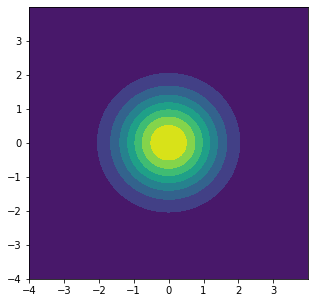

In [13]:
x, y = np.mgrid[-4:4:.01, -4:4:.01]
pos = np.dstack((x, y))
rv = multivariate_normal([0, 0], [[1, 0], [0, 1]])
fig2 = plt.figure(figsize=[5,5])
ax2 = fig2.add_subplot(111)
ax2.contourf(x, y, rv.pdf(pos))

### Non-Elliptical Multivariate Gaussian
Try make it non-elliptical by stochastising the correlation:
* variance = 1
* correlation = 0.9 half the time
* correlation = -0.9 half the time.

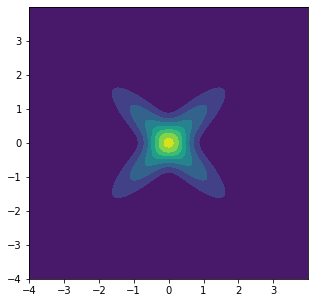

In [14]:
x, y = np.mgrid[-4:4:.01, -4:4:.01]
pos = np.dstack((x, y))

rv_positive = multivariate_normal([0, 0], [[1, 0.9], [0.9, 1]])
rv_negative = multivariate_normal([0, 0], [[1, -0.9], [-0.9, 1]])

fig2 = plt.figure(figsize=[5,5])
ax2 = fig2.add_subplot(111)
# Plot the mixed vol distribution
ax2.contourf(x, y, 0.5*rv_positive.pdf(pos)+0.5*rv_negative.pdf(pos))

# Try 3D Plots

In [15]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

### Joint Gaussian

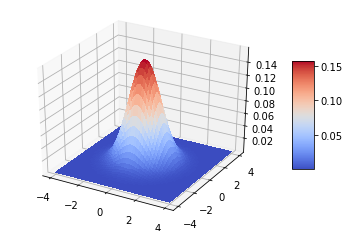

In [16]:
x, y = np.mgrid[-4:4:.01, -4:4:.01]
pos = np.dstack((x, y))
rv = multivariate_normal([0, 0], [[1, 0], [0, 1]])

fig = plt.figure()
ax = fig.gca(projection='3d')

z = rv.pdf(pos)

# Plot the surface.
surf = ax.plot_surface(x, y, z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

### Non-Elliptical Distribution
Gaussian with stochastic correlation

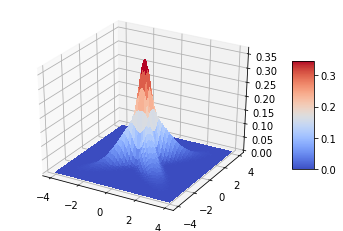

In [17]:
a = 0.5 #Amount by which we'll widen the variance

x, y = np.mgrid[-4:4:.01, -4:4:.01]
pos = np.dstack((x, y))
rv_positive = multivariate_normal([0, 0], [[1, 0.9], [0.9, 1]])
rv_negative = multivariate_normal([0, 0], [[1, -0.9], [-0.9, 1]])

fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
#X, Y = np.meshgrid(X, Y)

z = 0.5*rv_positive.pdf(pos)+0.5*rv_negative.pdf(pos)

# Plot the surface.
surf = ax.plot_surface(x, y, z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

### Chop the peak to see the tails better

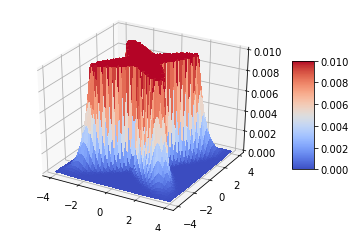

In [18]:
x, y = np.mgrid[-4:4:.01, -4:4:.01]
pos = np.dstack((x, y))

rv_positive = multivariate_normal([0, 0], [[1, 0.9], [0.9, 1]])
rv_negative = multivariate_normal([0, 0], [[1, -0.9], [-0.9, 1]])

fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
#X, Y = np.meshgrid(X, Y)

z = 0.5*rv_positive.pdf(pos)+0.5*rv_negative.pdf(pos)
chop_level = 0.01
z = chop_level*(z>chop_level)+z*(z<=chop_level)

# Plot the surface.
surf = ax.plot_surface(x, y, z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()